In [1]:
import pandas as pd

In [9]:
transactions = pd.read_csv('acquiring_unique_categorized_en.csv')
transactions.head(10)

,Date,The amount,Currency,Operation,Details,Business Type,Business Name,Address,City,OKED Code,OKED Description,OKED Description EN,Category
0,30.10.2025,-575.00 ₸,KZT,Acquiring,IP BERSINOVA S.IM.B.MOMYSH KZ,IP,BERSINOVA,S.IM.B.MOMYSH KZ,NaN,NaN,Розничная торговля путем заказа товаров по поч...,Retail trade by ordering goods by mail or via ...,Purchases
1,28.10.2025,"-1,070.00 ₸",KZT,Acquiring,SUPERMARKET GALMART NUR-SULTAN KZ,NaN,SUPERMARKET GALMART,NUR-SULTAN KZ,ASTANA,NaN,Розничная торговля прочими товарами на рынках,Retail trade of other goods in markets,Purchases
2,28.10.2025,"-33,600.00 ₸",KZT,Acquiring,TLP ASTANA Nur-Sultan KZ,NaN,TLP ASTANA,Nur-Sultan KZ,ASTANA,NaN,"Предоставление прочих индивидуальных услуг, не...",Provision of other individual services not inc...,Other
3,28.10.2025,"-1,180.00 ₸",KZT,Acquiring,IP BERSINOVA S.IM.B.MOMYSH KZ Pending amount. ...,IP,BERSINOVA S.IM.B.MOMYSH KZ Pending amount. We’...,payment network,NaN,NaN,NaN,NaN,Other
4,27.10.2025,-486.00 ₸,KZT,Acquiring,IP DANIYAROV A ASTANA KZ,IP,DANIYAROV A,ASTANA KZ,ASTANA,NaN,Оптовая торговля широким ассортиментом товаров...,Wholesale trade of a wide range of goods witho...,Other
5,26.10.2025,-500.00 ₸,KZT,Acquiring,IP ALFA GAME CLUB ASTANA,IP,ALFA GAME CLUB,ASTANA,ASTANA,NaN,"Сопровождение программного обеспечения, програ...","Maintenance of software, software products, da...",Entertainment
6,26.10.2025,"-6,100.00 ₸",KZT,Acquiring,BOOK CAFE ASTANA Q. KZ,NaN,BOOK CAFE ASTANA,Q. KZ,NaN,NaN,Деятельность ресторанов и предоставление услуг...,The activities of restaurants and the provisio...,Eating out
7,26.10.2025,"-2,140.00 ₸",KZT,Acquiring,YANDEX.GO ALMATY KZ,NaN,YANDEX.GO,ALMATY KZ,ALMATY,NaN,NaN,NaN,Transport
8,25.10.2025,"-4,660.00 ₸",KZT,Acquiring,YANDEX.EDA ALMATY KZ,NaN,YANDEX.EDA,ALMATY KZ,ALMATY,NaN,NaN,NaN,Eating out
9,24.10.2025,"-21,340.00 ₸",KZT,Acquiring,IP SMAGULOVA M ASTANA Q.,IP,SMAGULOVA M ASTANA,Q.,NaN,NaN,"Сопровождение программного обеспечения, програ...","Maintenance of software, software products, da...",Other


In [10]:
transactions.drop(columns=['Details', 'OKED Description', 'OKED Code'], inplace=True)

In [11]:
transactions.head(10)

,Date,The amount,Currency,Operation,Business Type,Business Name,Address,City,OKED Description EN,Category
0,30.10.2025,-575.00 ₸,KZT,Acquiring,IP,BERSINOVA,S.IM.B.MOMYSH KZ,NaN,Retail trade by ordering goods by mail or via ...,Purchases
1,28.10.2025,"-1,070.00 ₸",KZT,Acquiring,NaN,SUPERMARKET GALMART,NUR-SULTAN KZ,ASTANA,Retail trade of other goods in markets,Purchases
2,28.10.2025,"-33,600.00 ₸",KZT,Acquiring,NaN,TLP ASTANA,Nur-Sultan KZ,ASTANA,Provision of other individual services not inc...,Other
3,28.10.2025,"-1,180.00 ₸",KZT,Acquiring,IP,BERSINOVA S.IM.B.MOMYSH KZ Pending amount. We’...,payment network,NaN,NaN,Other
4,27.10.2025,-486.00 ₸,KZT,Acquiring,IP,DANIYAROV A,ASTANA KZ,ASTANA,Wholesale trade of a wide range of goods witho...,Other
5,26.10.2025,-500.00 ₸,KZT,Acquiring,IP,ALFA GAME CLUB,ASTANA,ASTANA,"Maintenance of software, software products, da...",Entertainment
6,26.10.2025,"-6,100.00 ₸",KZT,Acquiring,NaN,BOOK CAFE ASTANA,Q. KZ,NaN,The activities of restaurants and the provisio...,Eating out
7,26.10.2025,"-2,140.00 ₸",KZT,Acquiring,NaN,YANDEX.GO,ALMATY KZ,ALMATY,NaN,Transport
8,25.10.2025,"-4,660.00 ₸",KZT,Acquiring,NaN,YANDEX.EDA,ALMATY KZ,ALMATY,NaN,Eating out
9,24.10.2025,"-21,340.00 ₸",KZT,Acquiring,IP,SMAGULOVA M ASTANA,Q.,NaN,"Maintenance of software, software products, da...",Other


In [26]:
# Feature prep: concatenate Business Name + OKED Description EN
transactions["text"] = (
    transactions["Business Name"].fillna("") + " " + 
    transactions["OKED Description EN"].fillna("")
)

# Check class distribution
print("Class distribution:")
print(transactions["Category"].value_counts())
print()

# Filter out classes with < 2 samples (required for stratified split)
class_counts = transactions["Category"].value_counts()
valid_classes = class_counts[class_counts >= 3].index
transactions_filtered = transactions[transactions["Category"].isin(valid_classes)]

print(f"Removed {len(transactions) - len(transactions_filtered)} samples from classes with < 2 samples")
print(f"Remaining samples: {len(transactions_filtered)}")
print()

X = transactions_filtered["text"].values
y = transactions_filtered["Category"].values

print(f"Total samples: {len(X)}")
print(f"Unique categories: {set(y)}")


Class distribution:
Category
Eating out       28
Purchases        26
Other            18
Entertainment     2
Transport         2
Subscriptions     2
House             1
Name: count, dtype: int64

Removed 7 samples from classes with < 2 samples
Remaining samples: 72

Total samples: 72
Unique categories: {'Eating out', 'Purchases', 'Other'}


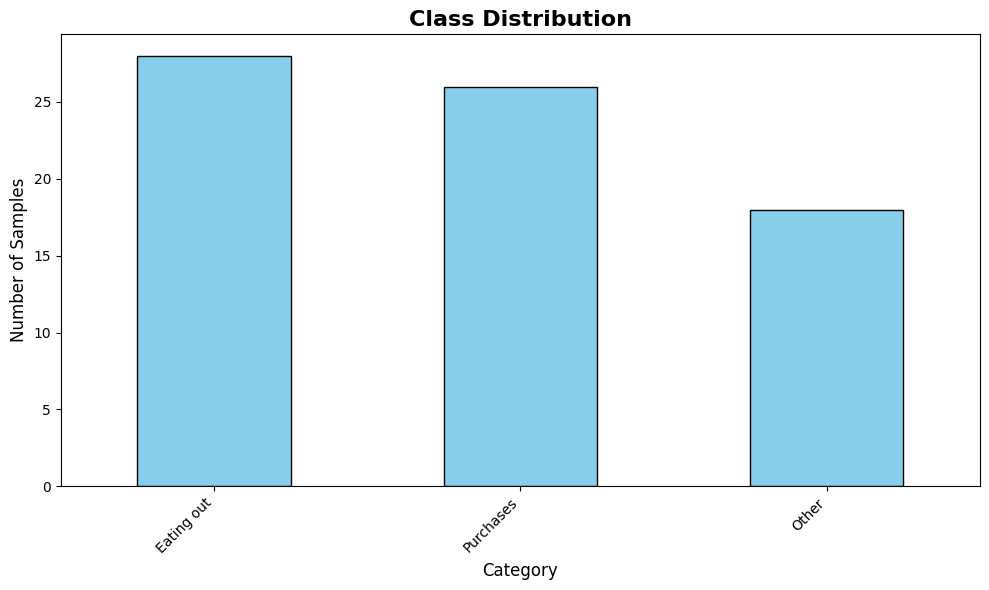

In [34]:
import matplotlib.pyplot as plt

# Class distribution bar chart
plt.figure(figsize=(10, 6))
class_counts = transactions_filtered["Category"].value_counts().sort_values(ascending=False)
class_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Class Distribution', fontsize=16, fontweight='bold')
plt.xlabel('Category', fontsize=12)
plt.ylabel('Number of Samples', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [27]:
# Split and TF-IDF vectorization
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

vec = TfidfVectorizer(ngram_range=(1,2), min_df=2, max_df=0.9, lowercase=True)
Xtr = vec.fit_transform(X_train)
Xte = vec.transform(X_test)

print(f"Train samples: {Xtr.shape[0]}, Test samples: {Xte.shape[0]}")
print(f"Features: {Xtr.shape[1]}")


Train samples: 57, Test samples: 15
Features: 195


In [28]:
# Train and evaluate models
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
import time

results = []


In [38]:
# LinearSVC
print("=" * 70)
print("LinearSVC")
print("=" * 70)
t0 = time.time()
svm = LinearSVC(random_state=42, max_iter=2000)
svm.fit(Xtr, y_train)
pred = svm.predict(Xte)
acc = accuracy_score(y_test, pred)
f1 = f1_score(y_test, pred, average='macro')
train_time = time.time() - t0
results.append({"Model": "LinearSVC", "Accuracy": acc, "F1 Macro": f1, "Time(s)": train_time})
print(f"\nAccuracy: {acc:.4f}")
print(f"F1 Macro: {f1:.4f}")
print(f"Train time: {train_time:.2f}s\n")
print("Classification Report:")
print(classification_report(y_test, pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, pred))


LinearSVC

Accuracy: 0.8667
F1 Macro: 0.8611
Train time: 0.14s

Classification Report:
              precision    recall  f1-score   support

  Eating out       0.83      0.83      0.83         6
       Other       0.75      0.75      0.75         4
   Purchases       1.00      1.00      1.00         5

    accuracy                           0.87        15
   macro avg       0.86      0.86      0.86        15
weighted avg       0.87      0.87      0.87        15


Confusion Matrix:
[[5 1 0]
 [1 3 0]
 [0 0 5]]


In [39]:
# Per-class scores for LinearSVC
report_dict = classification_report(y_test, pred, output_dict=True)

# Extract per-class metrics
per_class_scores = []
for label in sorted(set(y_test)):
    if label in report_dict:
        per_class_scores.append({
            'Category': label,
            'Precision': report_dict[label]['precision'],
            'Recall': report_dict[label]['recall'],
            'F1-Score': report_dict[label]['f1-score'],
            'Support': int(report_dict[label]['support'])
        })

svc_scores_df = pd.DataFrame(per_class_scores)
print("\nLinearSVC - Per-Class Scores:")
svc_scores_df



LinearSVC - Per-Class Scores:


,Category,Precision,Recall,F1-Score,Support
0,Eating out,0.833333,0.833333,0.833333,6
1,Other,0.750000,0.750000,0.750000,4
2,Purchases,1.000000,1.000000,1.000000,5


In [30]:
# MultinomialNB
print("=" * 70)
print("MultinomialNB")
print("=" * 70)
t0 = time.time()
nb = MultinomialNB()
nb.fit(Xtr, y_train)
pred = nb.predict(Xte)
acc = accuracy_score(y_test, pred)
f1 = f1_score(y_test, pred, average='macro')
train_time = time.time() - t0
results.append({"Model": "MultinomialNB", "Accuracy": acc, "F1 Macro": f1, "Time(s)": train_time})
print(f"\nAccuracy: {acc:.4f}")
print(f"F1 Macro: {f1:.4f}")
print(f"Train time: {train_time:.2f}s\n")
print("Classification Report:")
print(classification_report(y_test, pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, pred))


MultinomialNB

Accuracy: 0.7333
F1 Macro: 0.7157
Train time: 0.00s

Classification Report:
              precision    recall  f1-score   support

  Eating out       0.67      0.67      0.67         6
       Other       0.67      0.50      0.57         4
   Purchases       0.83      1.00      0.91         5

    accuracy                           0.73        15
   macro avg       0.72      0.72      0.72        15
weighted avg       0.72      0.73      0.72        15


Confusion Matrix:
[[4 1 1]
 [2 2 0]
 [0 0 5]]


In [31]:
# LogisticRegression
print("=" * 70)
print("LogisticRegression")
print("=" * 70)
t0 = time.time()
lr = LogisticRegression(max_iter=1000, random_state=42)
lr.fit(Xtr, y_train)
pred = lr.predict(Xte)
acc = accuracy_score(y_test, pred)
f1 = f1_score(y_test, pred, average='macro')
train_time = time.time() - t0
results.append({"Model": "LogisticRegression", "Accuracy": acc, "F1 Macro": f1, "Time(s)": train_time})
print(f"\nAccuracy: {acc:.4f}")
print(f"F1 Macro: {f1:.4f}")
print(f"Train time: {train_time:.2f}s\n")
print("Classification Report:")
print(classification_report(y_test, pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, pred))


LogisticRegression

Accuracy: 0.7333
F1 Macro: 0.7157
Train time: 0.01s

Classification Report:
              precision    recall  f1-score   support

  Eating out       0.67      0.67      0.67         6
       Other       0.67      0.50      0.57         4
   Purchases       0.83      1.00      0.91         5

    accuracy                           0.73        15
   macro avg       0.72      0.72      0.72        15
weighted avg       0.72      0.73      0.72        15


Confusion Matrix:
[[4 1 1]
 [2 2 0]
 [0 0 5]]


In [32]:
# XGBoost (if available) - requires numeric labels
print("=" * 70)
print("XGBClassifier")
print("=" * 70)
try:
    from xgboost import XGBClassifier
    from sklearn.preprocessing import LabelEncoder
    
    # Encode string labels to integers for XGBoost
    le = LabelEncoder()
    y_train_encoded = le.fit_transform(y_train)
    y_test_encoded = le.transform(y_test)
    
    t0 = time.time()
    xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
    xgb.fit(Xtr, y_train_encoded)
    pred_encoded = xgb.predict(Xte)
    
    # Decode predictions back to original labels
    pred = le.inverse_transform(pred_encoded)
    
    acc = accuracy_score(y_test, pred)
    f1 = f1_score(y_test, pred, average='macro')
    train_time = time.time() - t0
    results.append({"Model": "XGBClassifier", "Accuracy": acc, "F1 Macro": f1, "Time(s)": train_time})
    print(f"\nAccuracy: {acc:.4f}")
    print(f"F1 Macro: {f1:.4f}")
    print(f"Train time: {train_time:.2f}s\n")
    print("Classification Report:")
    print(classification_report(y_test, pred))
    print("\nConfusion Matrix:")
    print(confusion_matrix(y_test, pred))
except ImportError:
    print("\nXGBoost not available, skipping.")


XGBClassifier

Accuracy: 0.7333
F1 Macro: 0.7222
Train time: 0.13s

Classification Report:
              precision    recall  f1-score   support

  Eating out       0.67      0.67      0.67         6
       Other       0.50      0.50      0.50         4
   Purchases       1.00      1.00      1.00         5

    accuracy                           0.73        15
   macro avg       0.72      0.72      0.72        15
weighted avg       0.73      0.73      0.73        15


Confusion Matrix:
[[4 2 0]
 [2 2 0]
 [0 0 5]]


c:\Users\Lenovo\Desktop\hw-nlp\.venv\Lib\site-packages\xgboost\training.py:199: UserWarning: [00:42:30] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [33]:
# Summary of all models
print("=" * 70)
print("SUMMARY")
print("=" * 70)
results_df = pd.DataFrame(results)
results_df


SUMMARY


,Model,Accuracy,F1 Macro,Time(s)
0,LinearSVC,0.866667,0.861111,0.004000
1,MultinomialNB,0.733333,0.715729,0.003999
2,LogisticRegression,0.733333,0.715729,0.011000
3,XGBClassifier,0.733333,0.722222,0.135000


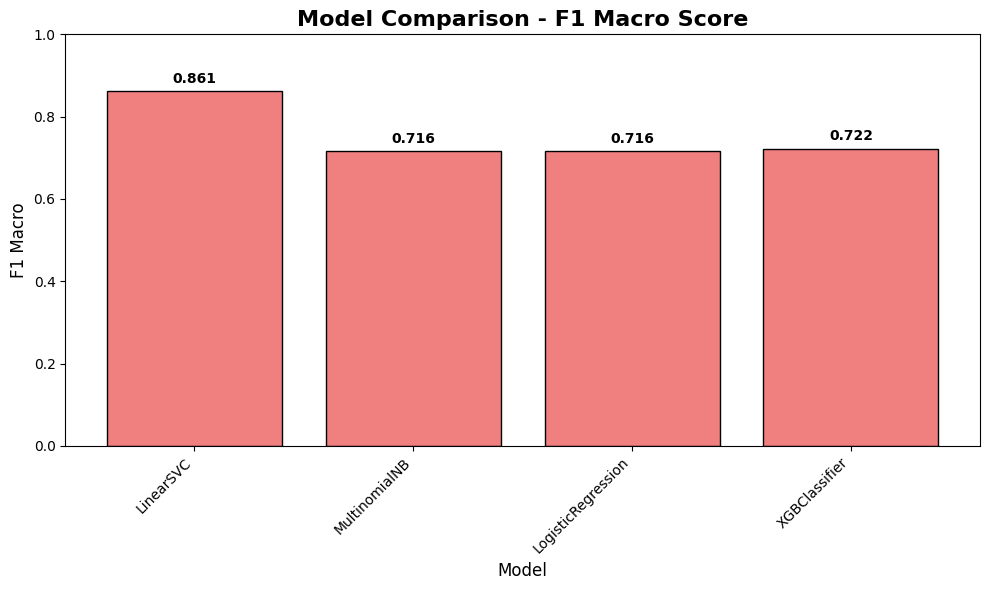

In [37]:
# Model comparison - F1 Macro
plt.figure(figsize=(10, 6))
plt.bar(results_df['Model'], results_df['F1 Macro'], color='lightcoral', edgecolor='black')
plt.title('Model Comparison - F1 Macro Score', fontsize=16, fontweight='bold')
plt.xlabel('Model', fontsize=12)
plt.ylabel('F1 Macro', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 1.0)
for i, v in enumerate(results_df['F1 Macro']):
    plt.text(i, v + 0.02, f'{v:.3f}', ha='center', fontweight='bold')
plt.tight_layout()
plt.show()


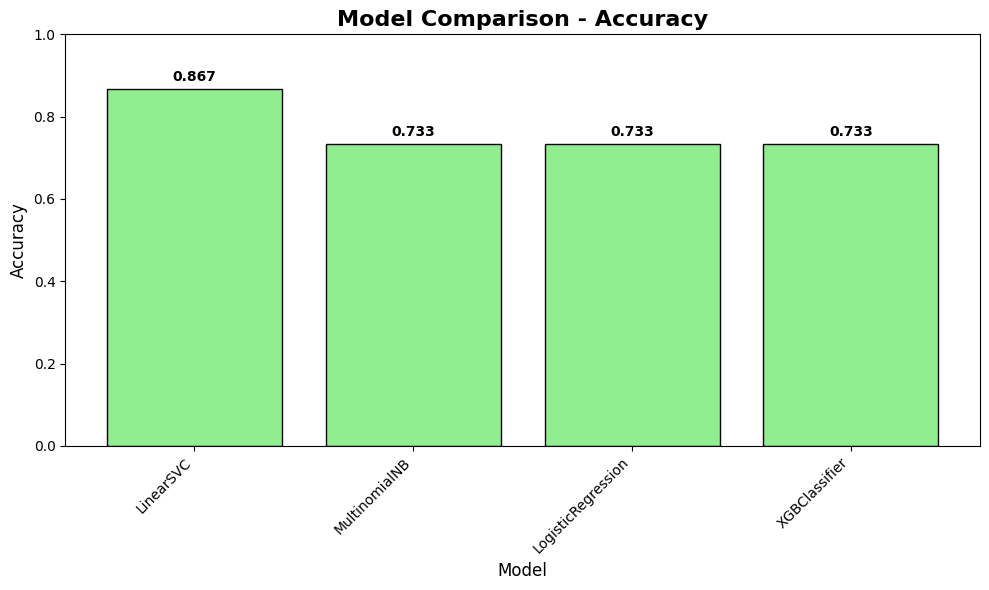

In [36]:
# Model comparison - Accuracy
plt.figure(figsize=(10, 6))
plt.bar(results_df['Model'], results_df['Accuracy'], color='lightgreen', edgecolor='black')
plt.title('Model Comparison - Accuracy', fontsize=16, fontweight='bold')
plt.xlabel('Model', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 1.0)
for i, v in enumerate(results_df['Accuracy']):
    plt.text(i, v + 0.02, f'{v:.3f}', ha='center', fontweight='bold')
plt.tight_layout()
plt.show()
